In [2]:
import torch
import matplotlib.pyplot as plt

# Mean Squared Error As a Loss Function

In [3]:

# preparing the data  (100 data with 1 feature)
X=torch.randn((100,1))

# preparing target values
Y=3*X + torch.randn((100,1))

In [4]:

# initializing random weight and bias

W=torch.randn((1,1))
b=torch.randn((1,1))

print(W,b)

W.shape

tensor([[0.8151]]) tensor([[0.5566]])


torch.Size([1, 1])

In [5]:

# first prediction
Y_hat=X@W+b

Y_hat.shape

torch.Size([100, 1])

In [6]:
# Mean Squared Error Loss function
Loss=1/2*((Y_hat-Y)**2).mean()
Loss

tensor(3.3025)

In [7]:
# Computing Gradients using chain rule

# dl by dy_hat
dL_dy_hat=(Y_hat-Y)/Y.shape[0]
dy_hat_dW=X

dL_db=dL_dy_hat.mean()
dL_dW=dy_hat_dW.T@dL_dy_hat

dL_dy_hat.shape
dL_dW.shape


torch.Size([1, 1])

In [8]:
# list to store the loss in each epoch
loss_list=[]

In [9]:

# Training
for i in range(1000):
    Y_hat=X@W+b
    
    Loss=1/2*((Y_hat-Y)**2).mean()
    loss_list.append(Loss)

    dL_dy_hat=(Y_hat-Y)/Y.shape[0]
    dy_hat_dW=X
    dL_db=dL_dy_hat.sum()
    dL_dW=dy_hat_dW.T@dL_dy_hat

    W=W-0.01*dL_dW
    b=b-0.01*dL_db


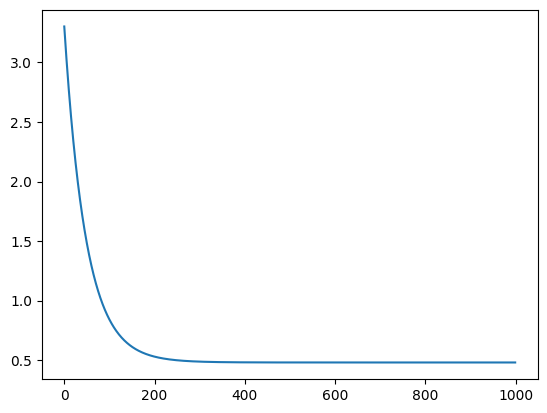

In [10]:
plt.plot(loss_list)

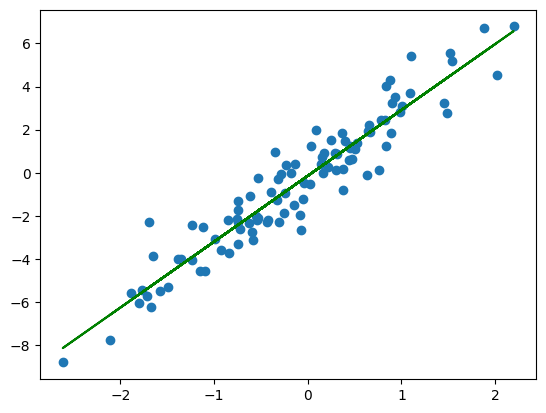

In [11]:
plt.scatter(X,Y)

X.shape,len(loss_list)
plt.plot(X,X@W+b,color="green")



# Mean Absolute Error As a Loss Function


In [12]:
# preparing dataset
X=torch.randn((100,1))

# preparing target values
Y=3*X + torch.randn((100,1))

In [13]:
# initializing weights and biases
W=torch.randn((1,1))
b=torch.randn((1,1))

print(W,b)

W.shape

tensor([[-2.1872]]) tensor([[-1.3045]])


torch.Size([1, 1])

In [14]:
# list to store the loss
loss_list=[]

In [15]:
# Training
for i in range(1000):
    Y_hat=X@W+b

    Loss=(abs(Y_hat-Y)).mean()

    # for MAE dL_dy_hat has two values according to (Y_hat-Y) is less than or greater than 0
    dL_dy_hat=torch.tensor([1 if Y_hat[i,0]>Y[i,0] else -1 for i in range(Y_hat.shape[0])])/Y.shape[0]
    loss_list.append(Loss)

    # gradient calculation
    dy_hat_dW=X
    dL_db=dL_dy_hat.sum()
    dL_dW=dy_hat_dW.T@dL_dy_hat

    # Weights and biases optimization
    W-=0.01*dL_dW
    b-=0.01*dL_db



In [16]:
dL_dy_hat.shape

torch.Size([100])

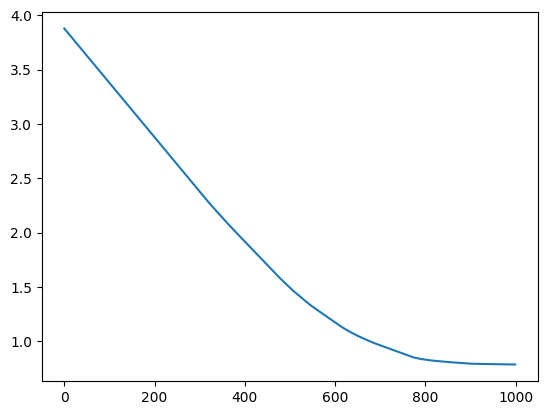

In [17]:
plt.plot(loss_list)

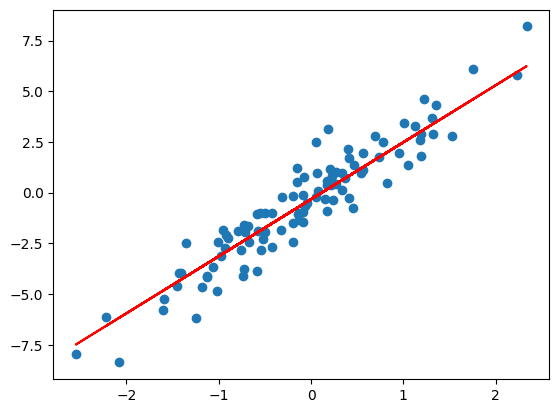

In [18]:
plt.scatter(X,Y)
plt.plot(X,X@W+b,color="Red")